In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host,
                                                          postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM heartdisease', con=engine)

engine.dispose()

# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

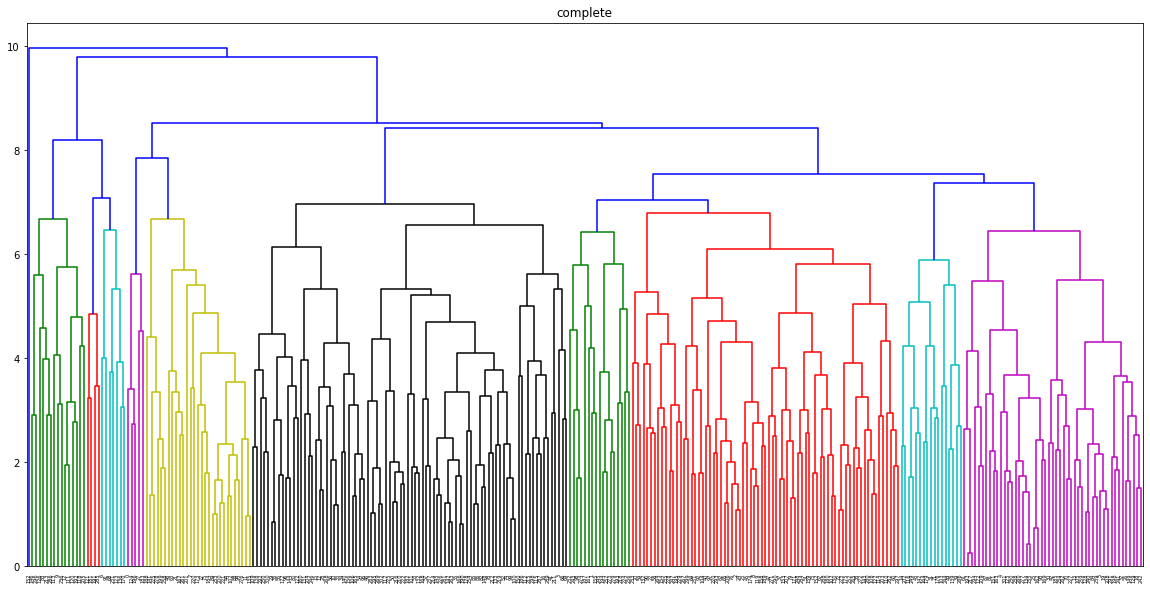

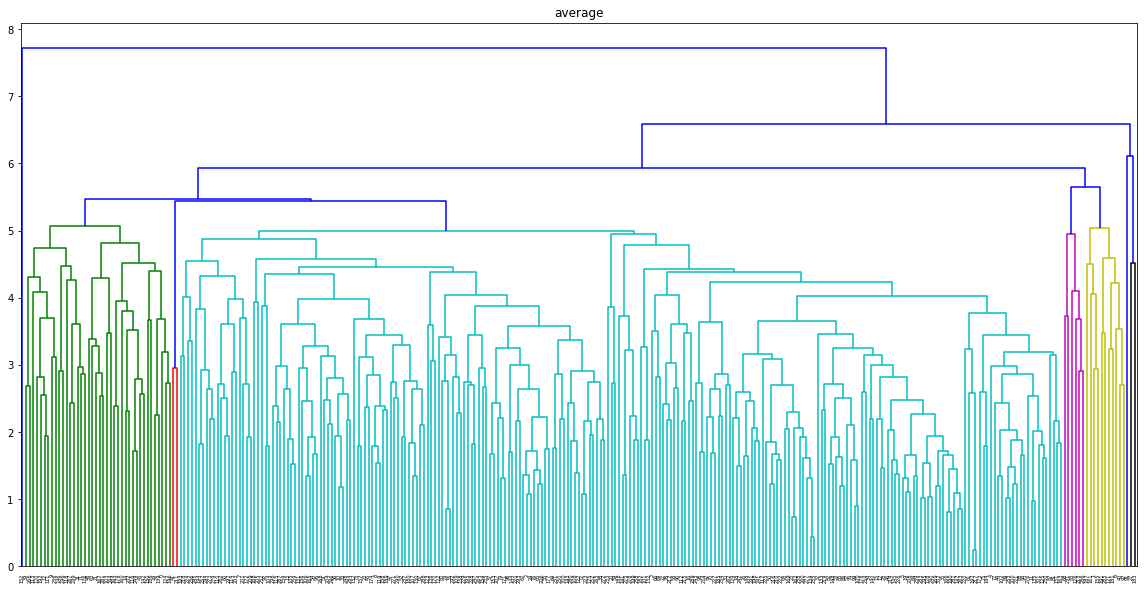

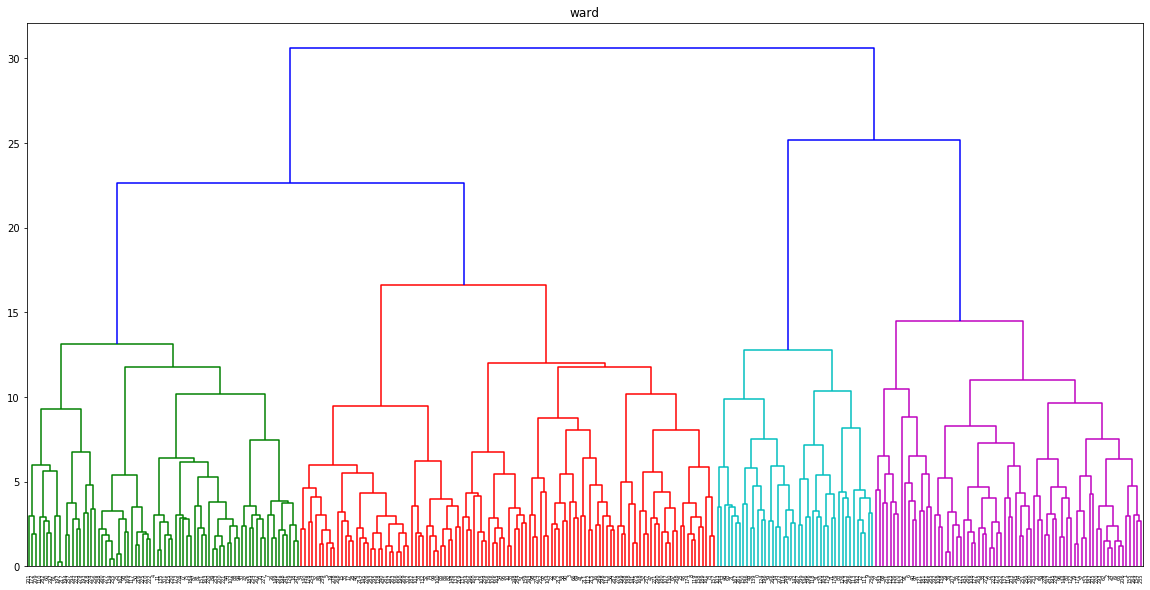

In [4]:
X_std = StandardScaler().fit_transform(X)

linkages = ['complete', 'average', 'ward']

for i in linkages:
    #producing dendrograms
    plt.figure(figsize=(20,10))
    dendrogram(linkage(X_std, method=i))
    plt.title(i)
    plt.show()
    

From the plots produced above it appears as though the ward method produces the most reasonable result because it provides the most organized dendrogram.

Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [12]:
for i in linkages:
    #define agglomerative clustering
    agg_cluster = AgglomerativeClustering(linkage=i, affinity='euclidean', n_clusters=2)

    #fit model
    clusters = agg_cluster.fit_predict(X_std)
    
    #calculating ari and silhouette scores
    ari = metrics.adjusted_rand_score(y, clusters)
    silhouette = metrics.silhouette_score(X_std, clusters, metric='euclidean')

    print('for {} linkage: ARI score = {}, silhouette score = {}'.format(i, ari, silhouette))
    

for complete linkage: ARI score = -0.0010061512759301477, silhouette score = 0.34836188921330785
for average linkage: ARI score = -0.0010061512759301477, silhouette score = 0.34836188921330785
for ward linkage: ARI score = 0.146129913123814, silhouette score = 0.1387197366557222


Based on the three linkage methods we tried we can see that the ward method has the highest ARI of .146. The other linkages have negative values. However we can see the silhouette score is higher for both complete and average. 